## CAR CONDITION PREDICTION
---- 
 ***This Jupyter notebook contains code for running Supervised Machine Learning Models to perform `classification tasks` on the cleaned Australian Vehicle Price dataset that was saved during the Exploratory Data analysis***

 
***Our goal is to develop and deploy machine learning regression models to `predict/classify the condition of a vehicle (either new or used)` based on its features. We are interested in the DEMO vehicles so we will drop the rows and focus on the New/Old vehicles.***

The processes to be taken include: 

>- Data Transformation
>- Feature selection
>- Balancing the data if imbalanced
>- Train Test Split
>- Standardization
>- Model selection
>- Model Training
>- Model Evaluation
>- Hyperparameter Tuning Using Kfold Cross Validation
>- Feature Engineering
>- Streamlit Deployment




### MODEL SELECTION 
---
The Machine Learning algorithms to perform classification tasks that will be used are: 

- Logistic Regression(log)
- Decision Tree Classifier(Dc)
- Random Forest Classifier(Rc)
- Support Vector Classifier(SVC)
- KNN Classifier(Knn)

## ***IMPORT NECESSARY LIBRARIES***

In [1]:
import pandas as pd
import numpy as np

#for visuals
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline


#for Label/Data encoding/transformation 
from sklearn.preprocessing import LabelEncoder


#for train test split
from sklearn.model_selection import train_test_split


#for Standardization 
from sklearn.preprocessing import MinMaxScaler


#balacning dataset
from imblearn.over_sampling import SMOTE
from collections import Counter

# import the necessary libraries for the model building
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


# algorithms for the evaluation of model performance
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score


#For cross validation
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import roc_curve, auc

# Suppress all warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
#Import the cleaned dataset
Data_2 = pd.read_csv("Cleaned_Australian_Vehicle_Price_Data.csv")

Data_2.head()

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,DriveType,FuelType,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price,Engine_Volumes(litres),Fuel_Consumption(litres),Fuel_Consumption_Per_Kilometers
0,Ssangyong,2022,Rexton,Sutherland Isuzu Ute,2022 Ssangyong Rexton Ultimate (awd),DEMO,Automatic,AWD,Diesel,5595.0,White / Black,"Caringbah, NSW",4 cyl,SUV,4,7,51990.0,2.2,8.7,100.0
1,MG,2022,MG3,Hatchback,2022 MG MG3 Auto Excite (with Navigation),USED,Automatic,Front,Premium,16.0,Black / Black,"Brookvale, NSW",4 cyl,Hatchback,5,5,19990.0,1.5,6.7,100.0
2,BMW,2022,430I,Coupe,2022 BMW 430I M Sport,USED,Automatic,Rear,Premium,8472.0,Grey / White,"Sylvania, NSW",4 cyl,Coupe,2,4,108988.0,2.5,6.6,100.0
3,Mercedes-Benz,2011,E500,Coupe,2011 Mercedes-Benz E500 Elegance,USED,Automatic,Rear,Premium,136517.0,White / Brown,"Mount Druitt, NSW",8 cyl,Coupe,2,4,32990.0,5.5,11.0,100.0
4,Renault,2022,Arkana,SUV,2022 Renault Arkana Intens,USED,Automatic,Front,Unleaded,1035.0,Grey / Black,"Castle Hill, NSW",4 cyl,SUV,4,5,34990.0,1.3,6.0,100.0


In [3]:
#rename the columns 
Data_2.rename(columns={"Car/Suv" : "CarOrSUV"}, inplace = True)
#Rename the Engine column in litres and fuel consumption in litres
Data_2.rename(columns={"Engine_Volumes(litres)" : "Engine_Volume_Litres"}, inplace = True)
Data_2.rename(columns={"Fuel_Consumption(litres)" : "Fuel_Consumption_Litres"}, inplace = True)


In [4]:
Data_2.sample(10)

,Brand,Year,Model,CarOrSUV,Title,UsedOrNew,Transmission,DriveType,FuelType,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price,Engine_Volume_Litres,Fuel_Consumption_Litres,Fuel_Consumption_Per_Kilometers
6145,Mercedes-Benz,2011,ML350,SUV,2011 Mercedes-Benz ML350 CDI Sports Luxury (4X4),USED,Automatic,4WD,Diesel,165000.0,Grey / -,"Fyshwick, ACT",6 cyl,SUV,4,5,22830.0,2.5,9.8,100.0
1106,Toyota,2018,Camry,Sedan,2018 Toyota Camry Ascent (hybrid),USED,Automatic,Front,Hybrid,94595.0,White / -,"Seven Hills, NSW",4 cyl,Sedan,4,5,34990.0,2.5,4.2,100.0
15749,Hyundai,2022,Santa,Kloster Hyundai Hamilton - New,2022 Hyundai Santa FE Crdi (awd),NEW,Automatic,AWD,Diesel,16.0,Blue / -,"Hamilton East, NSW",4 cyl,SUV,4,7,52485.0,2.2,6.1,100.0
13463,Skoda,2014,Octavia,Wagon,2014 Skoda Octavia RS 135 TDI,USED,Automatic,Front,Diesel,144756.0,White / Grey,"Victoria Park, WA",4 cyl,Wagon,4,5,21990.0,2.5,5.3,100.0
10564,Nissan,2019,Leaf,Hatchback,2019 Nissan Leaf,USED,Automatic,Front,Electric,13700.0,White / -,"Dandenong South, VIC",4 cyl,Hatchback,5,5,38200.0,2.5,0.0,100.0
15469,Hyundai,2016,Tucson,SUV,2016 Hyundai Tucson Elite (fwd),USED,Automatic,Front,Unleaded,136878.0,Blue / -,"Granville, NSW",4 cyl,SUV,4,5,21999.0,2.5,7.9,100.0
2394,Subaru,2012,Forester,SUV,2012 Subaru Forester X,USED,Automatic,AWD,Unleaded,114364.0,White / -,"Liverpool, NSW",4 cyl,SUV,4,5,15884.0,2.5,9.3,100.0
9593,Nissan,2018,Pathfinder,City Jeep - Pre Owned,2018 Nissan Pathfinder Ti X-tronic 2WD,USED,Automatic,Front,Unleaded,52414.0,White / Black,"Southbank, VIC",4 cyl,Wagon,4,5,37888.0,2.5,7.7,100.0
12222,Hyundai,2020,I30,Hatchback,2020 Hyundai I30,USED,Manual,Front,Unleaded,34914.0,Black / -,"Garbutt, QLD",4 cyl,Hatchback,4,5,25995.0,2.5,7.3,100.0
3629,Toyota,2008,Hilux,Ute / Tray,2008 Toyota Hilux SR5 (4X4),USED,Automatic,4WD,Diesel,245637.0,- / -,"Underwood, QLD",4 cyl,Ute / Tray,4,5,24990.0,2.5,9.5,100.0


In [5]:
#Data shape
Data_2.shape

# Remember that we created new columns and we didn't drop the missing values instead we filled them. 

(16376, 20)

In [6]:
#Display data information 
Data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16376 entries, 0 to 16375
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Brand                            16376 non-null  object 
 1   Year                             16376 non-null  int64  
 2   Model                            16376 non-null  object 
 3   CarOrSUV                         16376 non-null  object 
 4   Title                            16376 non-null  object 
 5   UsedOrNew                        16376 non-null  object 
 6   Transmission                     16376 non-null  object 
 7   DriveType                        16376 non-null  object 
 8   FuelType                         16376 non-null  object 
 9   Kilometres                       16376 non-null  float64
 10  ColourExtInt                     16376 non-null  object 
 11  Location                         16376 non-null  object 
 12  CylindersinEngine 

In [7]:
#To confirm that our data is cleaned 
Data_2.isnull().sum()

Brand                              0
Year                               0
Model                              0
CarOrSUV                           0
Title                              0
UsedOrNew                          0
Transmission                       0
DriveType                          0
FuelType                           0
Kilometres                         0
ColourExtInt                       0
Location                           0
CylindersinEngine                  0
BodyType                           0
Doors                              0
Seats                              0
Price                              0
Engine_Volume_Litres               0
Fuel_Consumption_Litres            0
Fuel_Consumption_Per_Kilometers    0
dtype: int64

In [8]:
Data_2.duplicated().sum()

0

In [9]:
#Descriptive analysis 
Data_2.describe().round()

,Year,Kilometres,Doors,Seats,Price,Engine_Volume_Litres,Fuel_Consumption_Litres,Fuel_Consumption_Per_Kilometers
count,16376.0,16376.0,16376.0,16376.0,16376.0,16376.0,16376.0,16376.0
mean,2016.0,95691.0,4.0,5.0,37712.0,2.0,8.0,100.0
std,5.0,69367.0,1.0,1.0,37374.0,1.0,2.0,0.0
min,1940.0,1.0,2.0,2.0,88.0,1.0,0.0,100.0
25%,2014.0,41969.0,4.0,5.0,19888.0,2.0,7.0,100.0
50%,2017.0,87630.0,4.0,5.0,29905.0,2.0,8.0,100.0
75%,2020.0,139256.0,4.0,5.0,44388.0,2.0,8.0,100.0
max,2023.0,295414.0,12.0,22.0,1500000.0,10.0,27.0,100.0


In [10]:
#Check the unique values in each column
def check_unique_values(Data_2):
    unique_values = Data_2.apply(pd.Series.nunique)  # Get unique values for each column
    
    return unique_values

In [11]:
#calling our function
unique_values = check_unique_values(Data_2)
print("Unique values for each column:")
print(unique_values)

Unique values for each column:
Brand                                 75
Year                                  44
Model                                776
CarOrSUV                             610
Title                               8635
UsedOrNew                              3
Transmission                           2
DriveType                              5
FuelType                               8
Kilometres                         13951
ColourExtInt                         829
Location                             614
CylindersinEngine                      8
BodyType                              10
Doors                                  9
Seats                                 13
Price                               3767
Engine_Volume_Litres                  57
Fuel_Consumption_Litres              156
Fuel_Consumption_Per_Kilometers        1
dtype: int64


In [12]:
#value count for the categorical columns

for i in Data_2.select_dtypes(include=['object']).columns.tolist():
    print(f'{i}--->{len(Data_2[i].unique())}')

Brand--->75
Model--->776
CarOrSUV--->610
Title--->8635
UsedOrNew--->3
Transmission--->2
DriveType--->5
FuelType--->8
ColourExtInt--->829
Location--->614
CylindersinEngine--->8
BodyType--->10


In [13]:
#Distribution of the condition of the vehicles
Car_condition = Data_2['UsedOrNew'].value_counts()
Car_condition

UsedOrNew
USED    14679
NEW      1191
DEMO      506
Name: count, dtype: int64

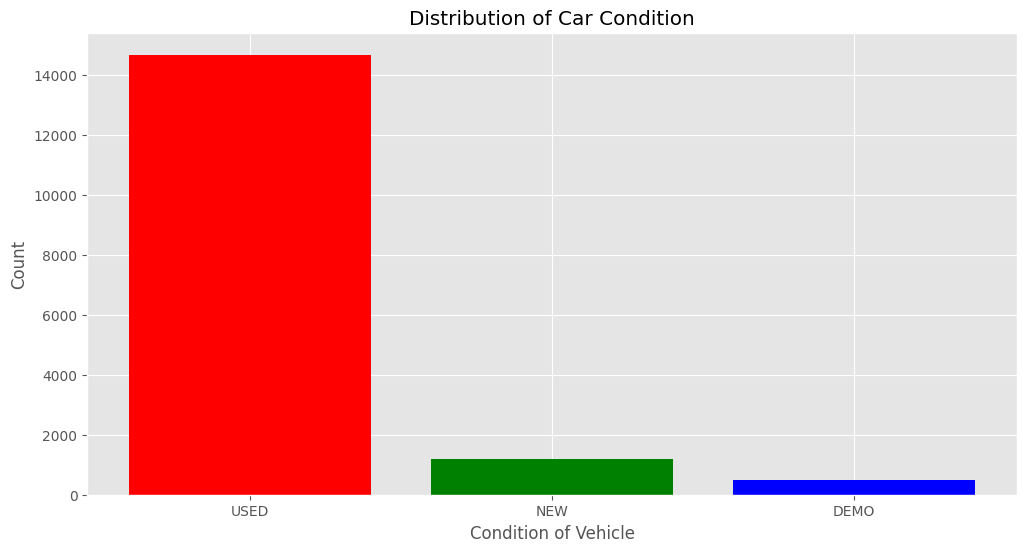

In [14]:
# Visualizing the distribution for the Car condition (our target)
fig, axs = plt.subplots(figsize = (12, 6))
axs.bar(Car_condition.index, Car_condition.values, color = ['red', 'green', "blue"])
axs.set_title('Distribution of Car Condition')
axs.set_xlabel('Condition of Vehicle')
axs.set_ylabel('Count')
    
# Display the plot
plt.show()

***We are not interested in Demo Cars; we are only interested in the New and Used Cars so we will drop the rows have Demo vehicles***

In [15]:
# Drop rows where UsedOrNew column has the value 'DEMO'
Data_2 = Data_2[Data_2['UsedOrNew'] != 'DEMO']

In [16]:
Data_2

,Brand,Year,Model,CarOrSUV,Title,UsedOrNew,Transmission,DriveType,FuelType,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price,Engine_Volume_Litres,Fuel_Consumption_Litres,Fuel_Consumption_Per_Kilometers
1,MG,2022,MG3,Hatchback,2022 MG MG3 Auto Excite (with Navigation),USED,Automatic,Front,Premium,16.0,Black / Black,"Brookvale, NSW",4 cyl,Hatchback,5,5,19990.0,1.5,6.7,100.0
2,BMW,2022,430I,Coupe,2022 BMW 430I M Sport,USED,Automatic,Rear,Premium,8472.0,Grey / White,"Sylvania, NSW",4 cyl,Coupe,2,4,108988.0,2.5,6.6,100.0
3,Mercedes-Benz,2011,E500,Coupe,2011 Mercedes-Benz E500 Elegance,USED,Automatic,Rear,Premium,136517.0,White / Brown,"Mount Druitt, NSW",8 cyl,Coupe,2,4,32990.0,5.5,11.0,100.0
4,Renault,2022,Arkana,SUV,2022 Renault Arkana Intens,USED,Automatic,Front,Unleaded,1035.0,Grey / Black,"Castle Hill, NSW",4 cyl,SUV,4,5,34990.0,1.3,6.0,100.0
5,Toyota,2004,Estima,ON FOUR WHEELS,2004 Toyota Estima T EDITION,USED,Automatic,Other,Unleaded,160230.0,Grey / -,"Saint Marys, NSW",4 cyl,Commercial,4,5,9990.0,2.5,7.7,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16370,Nissan,2021,Qashqai,SUV,2021 Nissan Qashqai TI,USED,Automatic,Front,Unleaded,32977.0,White / -,"Rocklea, QLD",4 cyl,SUV,4,5,36770.0,2.5,6.9,100.0
16371,Toyota,2014,Alphard,SYC Cars,2014 Toyota Alphard,USED,Automatic,Front,Unleaded,66000.0,Grey / -,"Rocklea, QLD",4 cyl,Commercial,7,5,29500.0,2.5,7.7,100.0
16372,Mercedes-Benz,2012,S-Class,USED Dealer ad,2012 Mercedes-Benz S-Class CDI BlueTEC,USED,Automatic,Rear,Diesel,117432.0,Silver / -,"Port Melbourne, VIC",4 cyl,SUV,4,5,39888.0,2.5,7.7,100.0
16374,Mercedes-Benz,2016,GLC250,SUV,2016 Mercedes-Benz GLC250,USED,Automatic,AWD,Premium,85525.0,Grey / Black,"Albion, QLD",4 cyl,SUV,4,5,41888.0,2.5,7.2,100.0


In [17]:
#View the UsedOrNew column to see the DEMO vehicles have been dropped
Data_2["UsedOrNew"].unique()

array(['USED', 'NEW'], dtype=object)

In [18]:
#shape of data
Data_2.shape

(15870, 20)

***The shape of the data has reduced because we have dropped rows with DEMO vehicles***

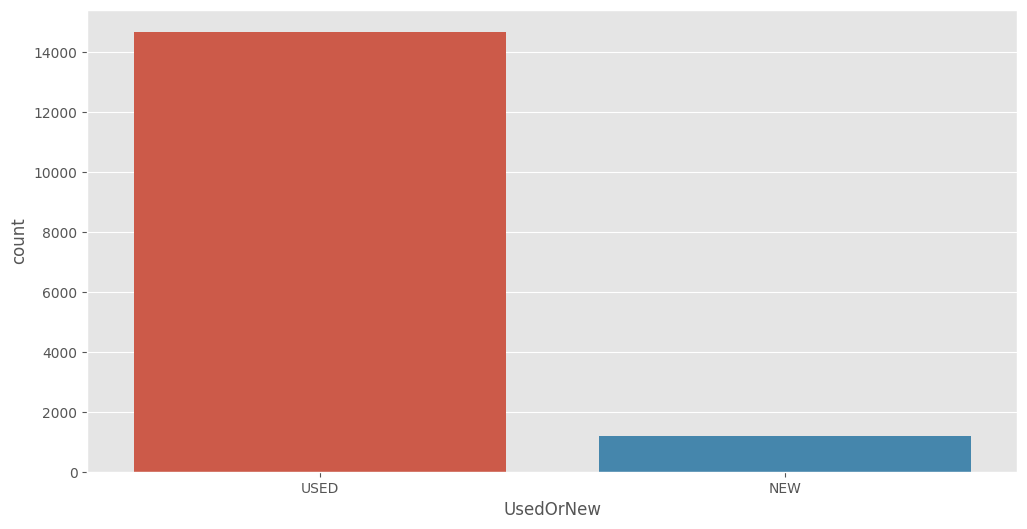

In [19]:
plt.figure(figsize = (12, 6))
sns.countplot(data = Data_2, x = "UsedOrNew");


***`USED CARS` appears more than `NEW CARS` making Used cars more popular***

## ***DATA ENCODING***

- We are going to convert our categorical data (object) to numerical data type using label encoder. 

In [20]:
# Get a list of categorical column names
categorical_columns = Data_2.select_dtypes(include=['object']).columns.tolist()

# Apply LabelEncoder to each categorical column
label_encoder = LabelEncoder()
for col in categorical_columns:
    Data_2[col] = label_encoder.fit_transform(Data_2[col])

In [21]:
Data_2.head()

,Brand,Year,Model,CarOrSUV,Title,UsedOrNew,Transmission,DriveType,FuelType,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price,Engine_Volume_Litres,Fuel_Consumption_Litres,Fuel_Consumption_Per_Kilometers
1,45,2022,488,197,7479,1,0,2,6,16.0,60,80,4,3,5,5,19990.0,1.5,6.7,100.0
2,4,2022,61,140,7279,1,0,4,6,8472.0,375,518,4,2,2,4,108988.0,2.5,6.6,100.0
3,50,2011,270,140,1681,1,0,4,6,136517.0,630,368,7,2,2,4,32990.0,5.5,11.0,100.0
4,61,2022,124,416,7599,1,0,2,7,1035.0,292,118,4,6,4,5,34990.0,1.3,6.0,100.0
5,72,2004,295,343,316,1,0,3,7,160230.0,268,468,4,0,4,5,9990.0,2.5,7.7,100.0


In [22]:
#Drop unnecessary column to avoid noise

columns_to_drop = ['Fuel_Consumption_Per_Kilometers', 'Title']
# Replace with the actual column names
Data_2 = Data_2.drop(columns=columns_to_drop, axis=1)

Data_2.head()

,Brand,Year,Model,CarOrSUV,UsedOrNew,Transmission,DriveType,FuelType,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price,Engine_Volume_Litres,Fuel_Consumption_Litres
1,45,2022,488,197,1,0,2,6,16.0,60,80,4,3,5,5,19990.0,1.5,6.7
2,4,2022,61,140,1,0,4,6,8472.0,375,518,4,2,2,4,108988.0,2.5,6.6
3,50,2011,270,140,1,0,4,6,136517.0,630,368,7,2,2,4,32990.0,5.5,11.0
4,61,2022,124,416,1,0,2,7,1035.0,292,118,4,6,4,5,34990.0,1.3,6.0
5,72,2004,295,343,1,0,3,7,160230.0,268,468,4,0,4,5,9990.0,2.5,7.7


In [23]:
#checking the correlation between the target and variable
Data_2.select_dtypes("number").corr()["UsedOrNew"]

Brand                      0.005851
Year                      -0.366577
Model                     -0.048738
CarOrSUV                   0.187130
UsedOrNew                  1.000000
Transmission               0.034120
DriveType                 -0.018032
FuelType                   0.034864
Kilometres                 0.212530
ColourExtInt               0.194491
Location                   0.008831
CylindersinEngine          0.047928
BodyType                   0.009322
Doors                      0.062172
Seats                      0.049052
Price                     -0.266199
Engine_Volume_Litres       0.003480
Fuel_Consumption_Litres    0.134987
Name: UsedOrNew, dtype: float64

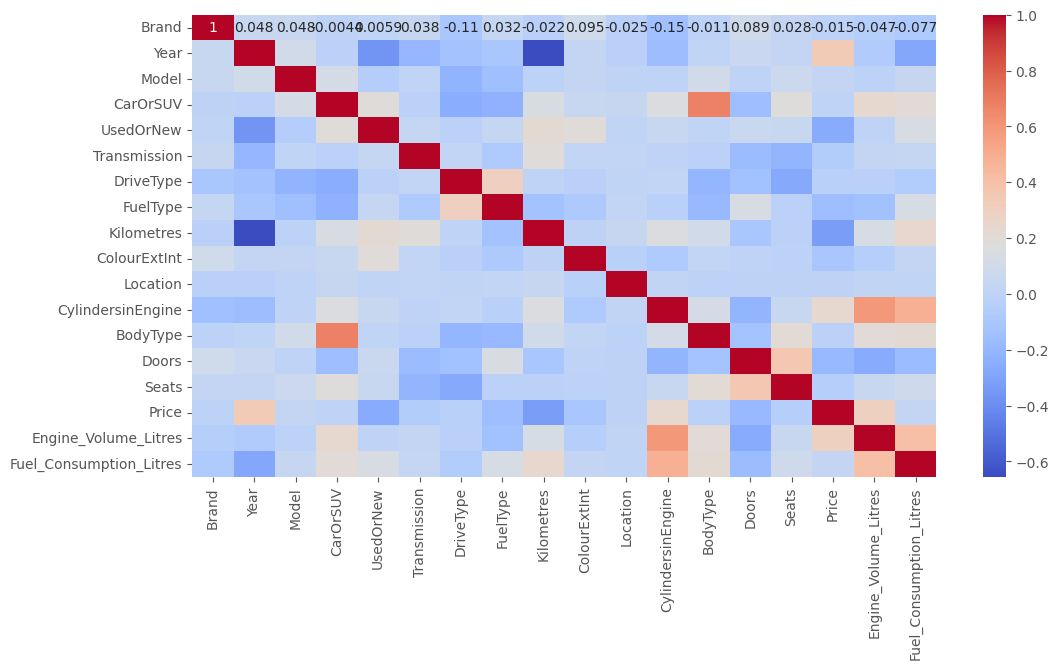

In [24]:
#corelation heatmp between target variable and numerical values
plt.figure(figsize = (12,6))
sns.heatmap(Data_2.select_dtypes("number").corr(), annot = True, cmap = "coolwarm");

## ***FEATURES SELECTIONS*** 

- The target y which is the vehicle car condition "UsedOrNew" that we what to predict that is the dependent variable. 
- The independent variables after dropping the target is our X, which is what we are going to train our model that is our features 

In [25]:
#Selecting the the features (independent variable)
X = Data_2.drop("UsedOrNew", axis = 1)

X.head()

,Brand,Year,Model,CarOrSUV,Transmission,DriveType,FuelType,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price,Engine_Volume_Litres,Fuel_Consumption_Litres
1,45,2022,488,197,0,2,6,16.0,60,80,4,3,5,5,19990.0,1.5,6.7
2,4,2022,61,140,0,4,6,8472.0,375,518,4,2,2,4,108988.0,2.5,6.6
3,50,2011,270,140,0,4,6,136517.0,630,368,7,2,2,4,32990.0,5.5,11.0
4,61,2022,124,416,0,2,7,1035.0,292,118,4,6,4,5,34990.0,1.3,6.0
5,72,2004,295,343,0,3,7,160230.0,268,468,4,0,4,5,9990.0,2.5,7.7


In [26]:
#Selecting the target variable(dependent varaible)

y = Data_2["UsedOrNew"]
y

1        1
2        1
3        1
4        1
5        1
        ..
16370    1
16371    1
16372    1
16374    1
16375    1
Name: UsedOrNew, Length: 15870, dtype: int32

## ***OVERSAMPLING WITH SMOTE***

- SMOTE is used to generate synthetic samples for the minority class, which helps to balance the class distribution in the dataset.

In [27]:
# Instantiate SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Resampled the data
X_resampled, y_resampled = smote.fit_resample(X, y)

# Print the class distribution before and after resampling
print('Class distribution before resampling: {}'.format(Counter(y)))
print('Class distribution after resampling: {}'.format(Counter(y_resampled)))

Class distribution before resampling: Counter({1: 14679, 0: 1191})
Class distribution after resampling: Counter({1: 14679, 0: 14679})


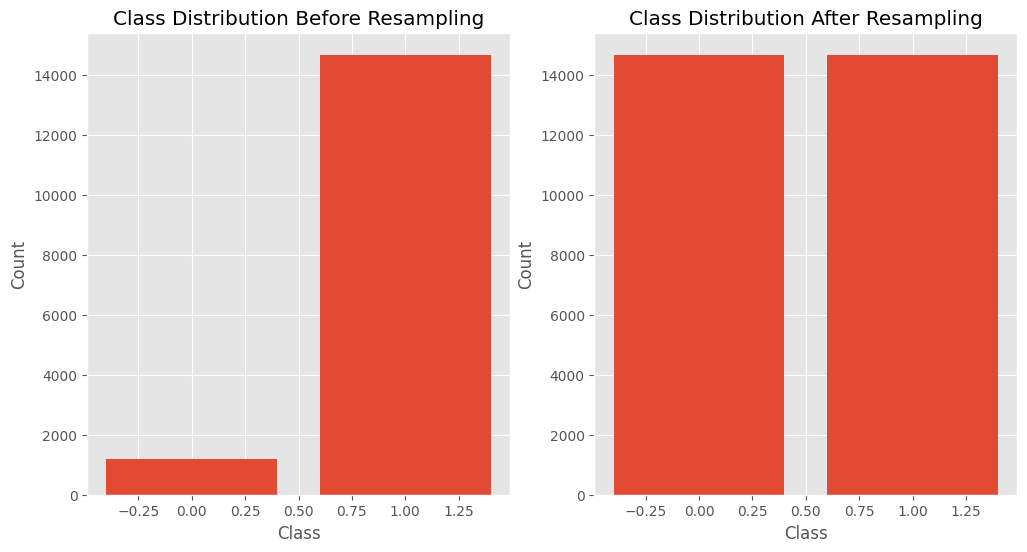

In [28]:
# Create a bar plot to visualize the class distribution before and after resampling
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot the class distribution before resampling
ax1.bar(Counter(y).keys(), Counter(y).values())
ax1.set_title('Class Distribution Before Resampling')
ax1.set_xlabel('Class')
ax1.set_ylabel('Count')

# Plot the class distribution after resampling
ax2.bar(Counter(y_resampled).keys(), Counter(y_resampled).values())
ax2.set_title('Class Distribution After Resampling')
ax2.set_xlabel('Class')
ax2.set_ylabel('Count')

plt.show()

***NOTE: 1 is USED cars and 0 is NEW Cars. Now we can work wih our data because it is balanced***

## ***TRAIN TEST SPLIT*** 

- We are going to split the dataset into training and testing set using the train_test_split function 
- We will get the test size 20% and training set to 80% and random state to 42

In [29]:
# split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.20, random_state = 42)

In [30]:
#Viewing the test and train set
print(X_test.head(3))
print(y_test.head(3))
print(X_train.head(3))
print(y_train.head(3))

       Brand  Year  Model  CarOrSUV  Transmission  DriveType  FuelType  \
8370      48  2017    145       494             0          4         0   
5640      72  2016    763       197             0          2         7   
26314     31  2023    244       319             0          3         1   

       Kilometres  ColourExtInt  Location  CylindersinEngine  BodyType  Doors  \
8370     105532.0           230       124                  5         8      4   
5640     133581.0           401         5                  4         3      5   
26314    100290.0            30       346                  6         1      2   

       Seats          Price  Engine_Volume_Litres  Fuel_Consumption_Litres  
8370       5   31999.000000              3.200000                 8.900000  
5640       5   18990.000000              1.500000                 6.300000  
26314      2  236209.040454              3.068212                 3.528897  
8370     1
5640     1
26314    0
Name: UsedOrNew, dtype: int32
       

In [31]:
# check the shape of the splitted data
print(f'The X_train shape: {X_train.shape}')
print(f'The X_test shape: {X_test.shape}')
print(f'The y_train shape: {y_train.shape}')
print(f'The y_test shape: {y_test.shape}')

The X_train shape: (23486, 17)
The X_test shape: (5872, 17)
The y_train shape: (23486,)
The y_test shape: (5872,)


### ***STANDARDIZATION***

- We will scale the features of the data using MinMax Scaler.
-  The goal is to standardize or normalize the range of independent variables or features of the dataset
- The essence of scaling is to ensure that the features in the dataset are on a similar scale, which can lead to improved model performance and more reliable results in machine learning tasks.

In [32]:
# Create an instance of MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the validation and test data
X_test_scaled = scaler.transform(X_test)

In [33]:
X_test_scaled

array([[0.64864865, 0.92771084, 0.18880208, ..., 0.04910956, 0.25842697,
        0.32962963],
       [0.97297297, 0.91566265, 0.99348958, ..., 0.02908931, 0.06741573,
        0.23333333],
       [0.41891892, 1.        , 0.31770833, ..., 0.36337942, 0.24361935,
        0.13069989],
       ...,
       [0.60810811, 1.        , 0.234375  , ..., 0.23503667, 0.60579768,
        0.1845366 ],
       [0.90540541, 1.        , 0.80078125, ..., 0.07615229, 0.17428183,
        0.2912212 ],
       [0.48648649, 1.        , 0.8828125 , ..., 0.41886019, 0.17977528,
        0.        ]])

In [34]:
X_train_scaled

array([[0.52702703, 0.96385542, 0.73697917, ..., 0.03044051, 0.03370787,
        0.21481481],
       [0.25675676, 0.84337349, 0.79427083, ..., 0.02755035, 0.17977528,
        0.34444444],
       [0.82432432, 0.86746988, 0.66927083, ..., 0.01833048, 0.17977528,
        0.28518519],
       ...,
       [0.97297297, 1.        , 0.60677083, ..., 0.16913412, 0.21348315,
        0.29259259],
       [0.41891892, 1.        , 0.91796875, ..., 0.06813257, 0.17977528,
        0.3       ],
       [0.27027027, 1.        , 0.18880208, ..., 0.08428719, 0.10353165,
        0.22204601]])

## ***MODELING(BUILDING, TRAINING AND EVALUATION)***

I am going to make use of five machine learning algorithms (models) to perform the classification task, and then eventually, the model that performs the best will be picked. 

- Logistic Regressor(log)
- Decision Tree Classifier(Dc)
- Random Forest Classifier(Rc)
- Support Vector Classifier(SVC)
- KNNClassifier

## ***LOGISTIC REGRESSION***

In [35]:
log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [36]:
log_probs = log_model.predict_proba(X_test_scaled)[:, 1]
log_probs

array([0.98874241, 0.95088211, 0.02981372, ..., 0.09759082, 0.1082549 ,
       0.0126846 ])

In [37]:
# create predictions
log_y_pred = log_model.predict(X_test_scaled)
accuracy_log = accuracy_score(log_y_pred, y_test)


# print accuracy score for Logistic Regression
print(f'The accuracy of the logistic regression is {round(accuracy_log*100, 1)}%')


The accuracy of the logistic regression is 93.3%


In [38]:
#Prediction performance for Logistic Regression
log_y_pred 

array([1, 1, 0, ..., 0, 0, 0])

## ***DECISION TREE CLASSIFIER***

In [39]:
Dc_model = DecisionTreeClassifier()
Dc_model.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [40]:
Dc_probs = Dc_model.predict_proba(X_test_scaled)[:, 1]
Dc_probs

array([1., 1., 0., ..., 0., 0., 0.])

In [41]:
# create predictions for Decision Tree Classifier 
Dc_y_pred = Dc_model.predict(X_test_scaled)
accuracy_dc = accuracy_score(Dc_y_pred, y_test)


# print accuracy score for Decision Tree Classifier
print(f'The accuracy of the Decision Tree Classifier is {round(accuracy_dc*100, 1)}%')

The accuracy of the Decision Tree Classifier is 99.7%


In [42]:
#Prediction performance for Decision Tree Classifier
Dc_y_pred

array([1, 1, 0, ..., 0, 0, 0])

## ***RANDOM FOREST CLASSIFIER***

In [43]:
Rc_model = RandomForestClassifier()
Rc_model.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [44]:
Rc_probs = Rc_model.predict_proba(X_test_scaled)[:, 1]
Rc_probs

array([1., 1., 0., ..., 0., 0., 0.])

In [45]:
# create predictions for Randsom Forest Classifier 
Rc_y_pred = Rc_model.predict(X_test_scaled)
accuracy_rc = accuracy_score(Rc_y_pred, y_test)


# print accuracy score for Random Forest Classifier
print(f'The accuracy of the Random Forest Classifier is {round(accuracy_rc*100, 1)}%')

The accuracy of the Random Forest Classifier is 99.9%


In [46]:
#Prediction performance for Random Forest Classifier
Rc_y_pred

array([1, 1, 0, ..., 0, 0, 0])

## ***SUPPORT VECTOR MACHINE CLASSIFIER (SVC)***

In [47]:
svc_model = SVC(probability = True)
svc_model.fit(X_train_scaled, y_train)

SVC(probability=True)

In [48]:
svc_probs = svc_model.predict_proba(X_test_scaled)[:, 1]
svc_probs

array([9.99999977e-01, 9.81700131e-01, 4.39400386e-04, ...,
       2.89402473e-03, 5.92171226e-03, 4.77257314e-03])

In [49]:
# create predictions for Support Vector Classifier 
svc_y_pred = svc_model.predict(X_test_scaled)
accuracy_svc = accuracy_score(svc_y_pred, y_test)


# print accuracy score for Support Vector Classifier
print(f'The accuracy of the Support Vector Classifier is {round(accuracy_svc*100, 1)}%')

The accuracy of the Support Vector Classifier is 97.3%


In [50]:
#Prediction performance for Support Vector Classifier
svc_y_pred

array([1, 1, 0, ..., 0, 0, 0])

## ***KNN (K NEAREST NEIGHBOR) CLASSIFIER***

In [51]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [52]:
knn_probs = knn_model.predict_proba(X_test_scaled)[:, 1]
knn_probs

array([1. , 0.6, 0. , ..., 0. , 0. , 0. ])

In [53]:
# create predictions for Support Vector Classifier 
knn_y_pred = knn_model.predict(X_test_scaled)
accuracy_knn = accuracy_score(knn_y_pred, y_test)


# print accuracy score for Support Vector Classifier
print(f'The accuracy of the KNN Classifier is {round(accuracy_knn*100, 1)}%')

The accuracy of the KNN Classifier is 97.6%


In [54]:
#Prediction performance for KNN Classifier
knn_y_pred

array([1, 1, 0, ..., 0, 0, 0])

### ***SUMMARY OF THE MODEL TRAINING AND PERFORMANCE***

In [55]:
#puttig models in dictionary
models = {
    "Logistics Regression": LogisticRegression(),
    "DecisionTree Classifier": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVC": SVC(),
    "KNN": KNeighborsClassifier()
}

In [56]:
#Ssetting up a function to predict and score model 
def fit_predict_and_score(models, X_train_scaled, X_test_scaled, y_train, y_test):
    model_score = {} #to keep the score
    #looping through models
    for name, model in models.items():
        #fit the model to the data
        model.fit(X_train_scaled, y_train)
        training_predict = model.predict(X_train_scaled)
        testing_predict = model.predict(X_test_scaled)
        training_accuracy = accuracy_score(training_predict, y_train)
        testing_accuracy = accuracy_score(testing_predict, y_test)
        model_score[name] = f"has a score of {training_accuracy} on training  set and a score of {testing_accuracy} on testing set"
    return model_score 
        

In [57]:
fit_predict_and_score(models, X_train_scaled, X_test_scaled, y_train, y_test)

{'Logistics Regression': 'has a score of 0.9305117942604104 on training  set and a score of 0.9325613079019074 on testing set',
 'DecisionTree Classifier': 'has a score of 1.0 on training  set and a score of 0.9967643051771117 on testing set',
 'Random Forest': 'has a score of 1.0 on training  set and a score of 0.9988079019073569 on testing set',
 'SVC': 'has a score of 0.9733884016009537 on training  set and a score of 0.9730926430517711 on testing set',
 'KNN': 'has a score of 0.9847142978795879 on training  set and a score of 0.9756471389645777 on testing set'}

### ***From our models result, we can see that our model have good accuracy scores on the training set and on the test set but `Random Forest Classifier` performed the better with a higher accuracy of 99.9% that is 0.99  so we can say that Random Forest is the best perfoming model followed by `Decision Tree Classfier`***

## ***MODEL EVALUATION***

>- `Accuracy`: Accuracy is a measure of the overall correctness of the model and is calculated as the ratio of correctly predicted instances to the total instances. It is a good metric when the classes are balanced.

>- `F1-Score`: F1 score is the harmonic mean of precision and recall. It provides a balance between precision and recall and is especially useful when the class distribution is imbalanced. F1 score reaches its best value at 1 and worst at 0.

>- `Precision`: Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. It measures the accuracy of the positive predictions. A high precision means that an algorithm returned substantially more relevant results than irrelevant ones.

>- `Recall (Sensitivity)`: Recall is the ratio of correctly predicted positive observations to all observations in the actual class. It measures the ability of the model to find all the positive samples. High recall indicates the class is correctly recognized.

>- `Confusion Matrix`: Confusion matrix is a table that is often used to describe the performance of a classification model. It contains information about actual and predicted classifications done by the classification model.

>-   `True Negative (TN)`: This is the number of negative instances that were correctly classified as negative by the model.

>-   `True Positive (TP)`: This is the number of positive instances that were correctly classified as positive by the model.

>-   `False Negative (FN)`: Also known as Type II error, this is the number of positive instances that were incorrectly classified as negative by the model.

>-   `False Positive (FP)`: Also known as Type I error, this is the number of negative instances that were incorrectly classified as positive by the model.

In [58]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def metrics_calculator(y_true, y_pred, model_name):
    '''
    Calculates and return a dictionary of performance metrics for a binary classification model
    '''
    # Calculate performance metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    # Create a dictionary of results
    results = {'Model': model_name, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-Score': f1}
    return results


## ***Logistic Regression model Result***

In [59]:
# model metrics
log_result = metrics_calculator(y_test, log_y_pred, 'log_model')
log_result

{'Model': 'log_model',
 'Accuracy': 0.9325613079019074,
 'Precision': 0.9587554269175108,
 'Recall': 0.9038199181446112,
 'F1-Score': 0.9304775280898876}

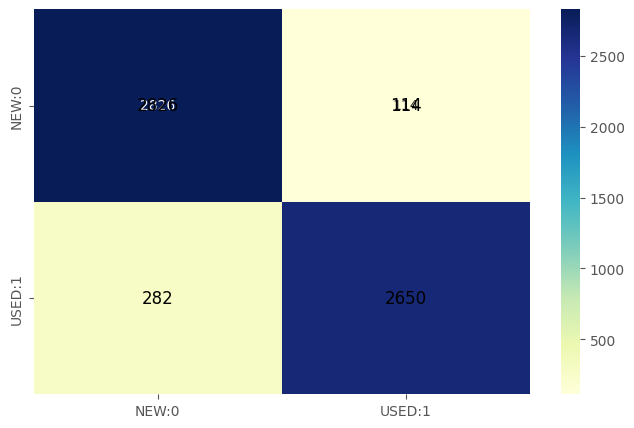

In [60]:
#confusion matrix 
cm = confusion_matrix(y_test, log_y_pred)
conf_matrix = pd.DataFrame(data=cm, columns=["NEW:0", "USED:1"], index=["NEW:0", "USED:1"])
plt.figure(figsize=(8,5))
sns.heatmap(conf_matrix, annot = True, fmt="d", cmap = "YlGnBu")
for i in range(len(cm)):
    for j in range(len(cm)): 
        plt.text(j+0.5, i+0.5, cm[i, j], ha='center', va='center', color='black', fontsize=12)

plt.show()

In [61]:
#Classification report
log_report = classification_report(log_y_pred, y_test)
print(log_report)

              precision    recall  f1-score   support

           0       0.96      0.91      0.93      3108
           1       0.90      0.96      0.93      2764

    accuracy                           0.93      5872
   macro avg       0.93      0.93      0.93      5872
weighted avg       0.93      0.93      0.93      5872



## ***Decision Tree Classifier model Result***

In [62]:
#Decision Tree Classifier Result 
Dc_result = metrics_calculator(y_test, Dc_y_pred, 'Dc_model')
Dc_result

{'Model': 'Dc_model',
 'Accuracy': 0.9969346049046321,
 'Precision': 0.9969304229195088,
 'Recall': 0.9969304229195088,
 'F1-Score': 0.9969304229195088}

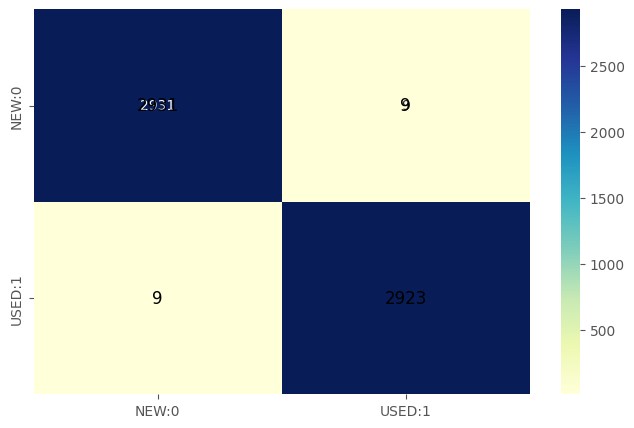

In [63]:
#confusion matrix 
cm = confusion_matrix(y_test, Dc_y_pred)
conf_matrix = pd.DataFrame(data=cm, columns=["NEW:0", "USED:1"], index=["NEW:0", "USED:1"])
plt.figure(figsize=(8,5))
sns.heatmap(conf_matrix, annot = True, fmt="d", cmap = "YlGnBu")
for i in range(len(cm)):
    for j in range(len(cm)): 
        plt.text(j+0.5, i+0.5, cm[i, j], ha='center', va='center', color='black', fontsize=12)

plt.show()

In [64]:
#Classification report
Dc_report = classification_report(Dc_y_pred, y_test)
print(Dc_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2940
           1       1.00      1.00      1.00      2932

    accuracy                           1.00      5872
   macro avg       1.00      1.00      1.00      5872
weighted avg       1.00      1.00      1.00      5872



## ***Random Forest Classifier model Result***

In [65]:
#Random Forest Classifier Result 
Rc_result = metrics_calculator(y_test, Rc_y_pred, 'Rc_model')
Rc_result

{'Model': 'Rc_model',
 'Accuracy': 0.9988079019073569,
 'Precision': 0.9996583532627263,
 'Recall': 0.9979536152796725,
 'F1-Score': 0.998805256869773}

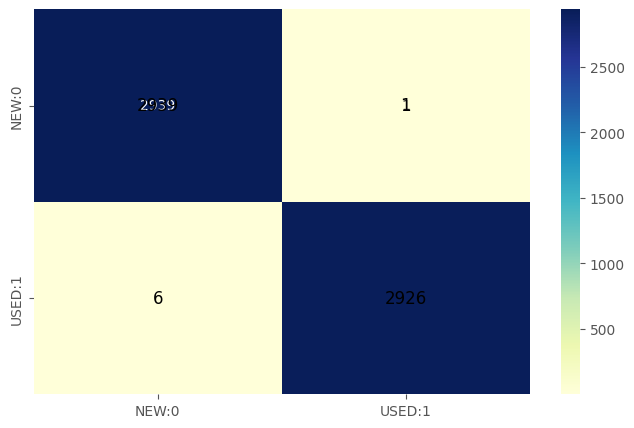

In [66]:
#confusion matrix 
cm = confusion_matrix(y_test, Rc_y_pred)
conf_matrix = pd.DataFrame(data=cm, columns=["NEW:0", "USED:1"], index=["NEW:0", "USED:1"])
plt.figure(figsize=(8,5))
sns.heatmap(conf_matrix, annot = True, fmt="d", cmap = "YlGnBu")
for i in range(len(cm)):
    for j in range(len(cm)): 
        plt.text(j+0.5, i+0.5, cm[i, j], ha='center', va='center', color='black', fontsize=12)

plt.show()

In [67]:
#Classification report
Rc_report = classification_report(Rc_y_pred, y_test)
print(Rc_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2945
           1       1.00      1.00      1.00      2927

    accuracy                           1.00      5872
   macro avg       1.00      1.00      1.00      5872
weighted avg       1.00      1.00      1.00      5872



## ***Support Vector Classifier model Result***

In [68]:
#Support Vector  Classifier Result 
svc_result = metrics_calculator(y_test, svc_y_pred, 'svc_model')
svc_result

{'Model': 'svc_model',
 'Accuracy': 0.9730926430517711,
 'Precision': 0.9846261355695318,
 'Recall': 0.961118690313779,
 'F1-Score': 0.9727304107697619}

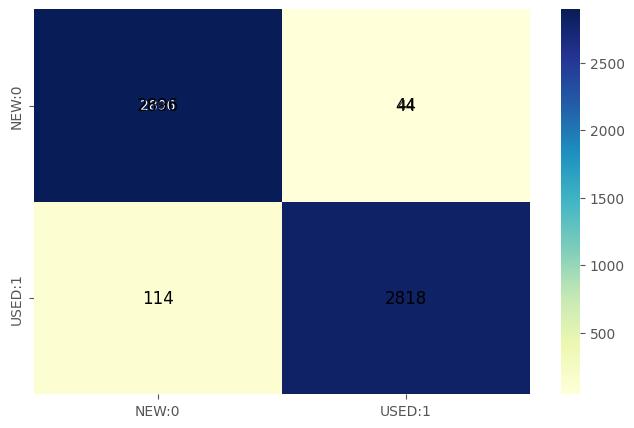

In [69]:
#confusion matrix 
cm = confusion_matrix(y_test, svc_y_pred)
conf_matrix = pd.DataFrame(data=cm, columns=["NEW:0", "USED:1"], index=["NEW:0", "USED:1"])
plt.figure(figsize=(8,5))
sns.heatmap(conf_matrix, annot = True, fmt="d", cmap = "YlGnBu")
for i in range(len(cm)):
    for j in range(len(cm)): 
        plt.text(j+0.5, i+0.5, cm[i, j], ha='center', va='center', color='black', fontsize=12)

plt.show()

In [70]:
#Classification report
svc_report = classification_report(svc_y_pred, y_test)
print(svc_report)

              precision    recall  f1-score   support

           0       0.99      0.96      0.97      3010
           1       0.96      0.98      0.97      2862

    accuracy                           0.97      5872
   macro avg       0.97      0.97      0.97      5872
weighted avg       0.97      0.97      0.97      5872



## ***KNN Classifier model Result***

In [71]:
#KNN Classifier Result 
knn_result = metrics_calculator(y_test, knn_y_pred, 'knn_model')
knn_result

{'Model': 'knn_model',
 'Accuracy': 0.9756471389645777,
 'Precision': 0.9891266222378113,
 'Recall': 0.9618008185538881,
 'F1-Score': 0.9752723499913539}

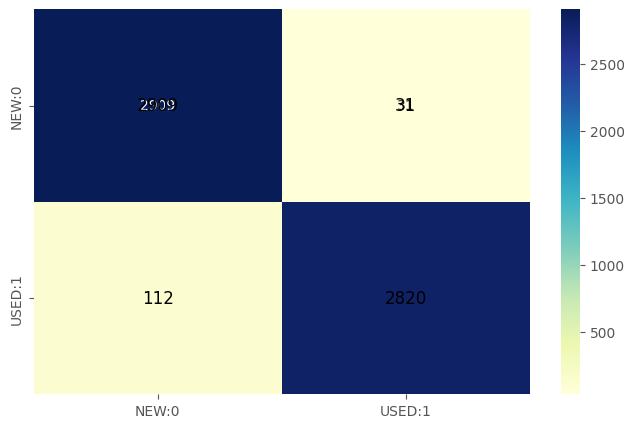

In [72]:
#confusion matrix 
cm = confusion_matrix(y_test, knn_y_pred)
conf_matrix = pd.DataFrame(data=cm, columns=["NEW:0", "USED:1"], index=["NEW:0", "USED:1"])
plt.figure(figsize=(8,5))
sns.heatmap(conf_matrix, annot = True, fmt="d", cmap = "YlGnBu")
for i in range(len(cm)):
    for j in range(len(cm)): 
        plt.text(j+0.5, i+0.5, cm[i, j], ha='center', va='center', color='black', fontsize=12)

plt.show()

In [73]:
#Classification report
knn_report = classification_report(knn_y_pred, y_test)
print(knn_report)

              precision    recall  f1-score   support

           0       0.99      0.96      0.98      3021
           1       0.96      0.99      0.98      2851

    accuracy                           0.98      5872
   macro avg       0.98      0.98      0.98      5872
weighted avg       0.98      0.98      0.98      5872



In [74]:
# Concatenate results into a single dataframe all the model metric calculator results
results_df = pd.DataFrame([log_result, Dc_result, Rc_result, svc_result, knn_result])

results_df

,Model,Accuracy,Precision,Recall,F1-Score
0,log_model,0.932561,0.958755,0.903820,0.930478
1,Dc_model,0.996935,0.996930,0.996930,0.996930
2,Rc_model,0.998808,0.999658,0.997954,0.998805
3,svc_model,0.973093,0.984626,0.961119,0.972730
4,knn_model,0.975647,0.989127,0.961801,0.975272


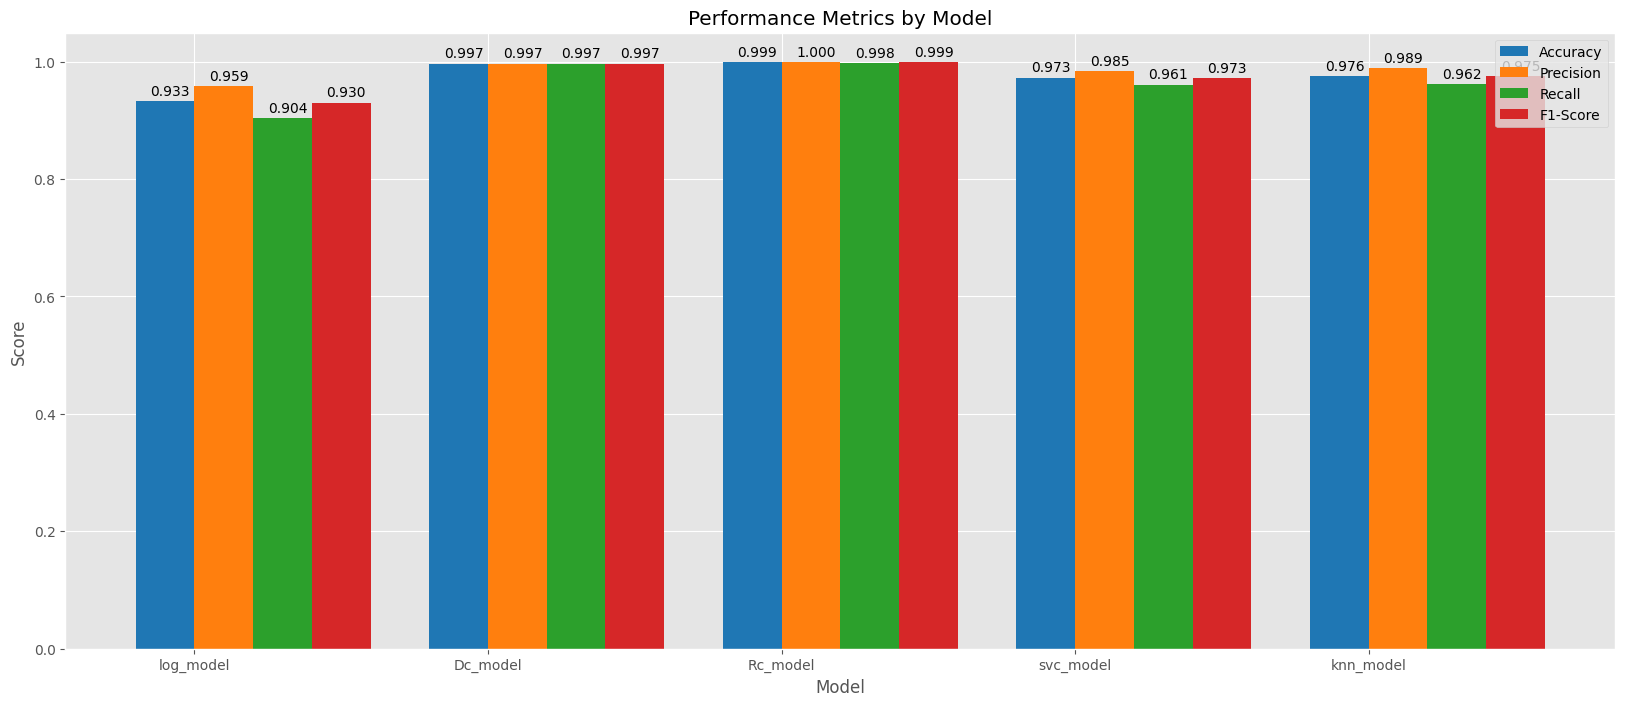

In [75]:
# Plotting the evaluation metrics of each model
plt.figure(figsize=(20, 8))

# Set the width of the bars
bar_width = 0.2

# Create a bar chart of the metrics for each model
models = results_df['Model']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

for i, metric in enumerate(metrics):
    plt.bar(np.arange(len(models)) + i * bar_width, results_df[metric], width=bar_width, color=colors[i], label=metric)
    for j, value in enumerate(results_df[metric]):
        plt.text(j + i * bar_width - 0.05, value + 0.01, '{:.3f}'.format(value))

# Add labels and legend
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Performance Metrics by Model')
plt.xticks(np.arange(len(models)) + bar_width / 2, models)
plt.legend()

# Show the chart
plt.show()


## ***SUMMARY***

- All models perform well based on the provided metrics, with high accuracy, precision, recall, and F1-Score values.

- The `Rc_model` stand out with exceptionally high performance across all metrics, while the other models also demonstrate strong performance in classification tasks.

- `Rc_model` shows extremely high accuracy showing excellent overall performance, very `high precision` indicating a high proportion of correctly predicted positive observations, `high recall` showing a high ratio of correctly predicted positive observations and very `high F1-Score` reflecting a balance between precision and recall.

***Therefore, the Random Forest model (Rc_model) stands out as the top-performing model, achieving an exceptional accuracy of 99.88%, precision of 100%, and recall of 99.80% based on the evaluation metrics. It demonstrates a remarkable ability to provide a balanced measure between correctly identifying the condition of Vehicles, and distinguishing between Used cars (labeled as 1) and New cars (labeled as 0). With an impressive accuracy of 99.88%, the Random Forest model excels in predicting the status of Cars as either Used or New***

## ***AUC-ROC***

>- *`AUC-ROC` provides a single value that summarizes the performance of a classification model across all possible classification thresholds. It allows for easy comparison between different models, with higher AUC-ROC values indicating better performance.*

>- *The ROC curve and AUC provide a visual representation of the model's performance across different thresholds, making it easier to interpret how well the model separates classes.*

>- AUC-ROC is a versatile metric that provides valuable insights into the overall performance of classification models, making it a widely used and informative tool in evaluating and comparing the effectiveness of different models in classification tasks.

In [76]:
# Calculate the AUC-ROC for logistic regression
log_auc = roc_auc_score(y_test, log_probs)

# Calculate the AUC-ROC for decision tree
Dc_auc = roc_auc_score(y_test, Dc_probs)

# Calculate the AUC-ROC for Random Forest
Rc_auc = roc_auc_score(y_test, Rc_probs)

# Calculate the AUC-ROC for svc
svc_auc = roc_auc_score(y_test, svc_probs)

# Calculate the AUC-ROC for KNN
knn_auc = roc_auc_score(y_test, knn_probs)

# Print the AUC-ROC scores
print(f'Logistic Regression AUC-ROC: {log_auc:.2f}')
print(f'Decision Tree AUC-ROC: {Dc_auc:.2f}')
print(f'Random Forest AUC-ROC: {Rc_auc:.2f}')
print(f'Support Vector Machine Classifier AUC-ROC: {svc_auc:.2f}')
print(f'K-Nearest Neighbor AUC-ROC: {knn_auc:.2f}')

Logistic Regression AUC-ROC: 0.98
Decision Tree AUC-ROC: 1.00
Random Forest AUC-ROC: 1.00
Support Vector Machine Classifier AUC-ROC: 1.00
K-Nearest Neighbor AUC-ROC: 0.99


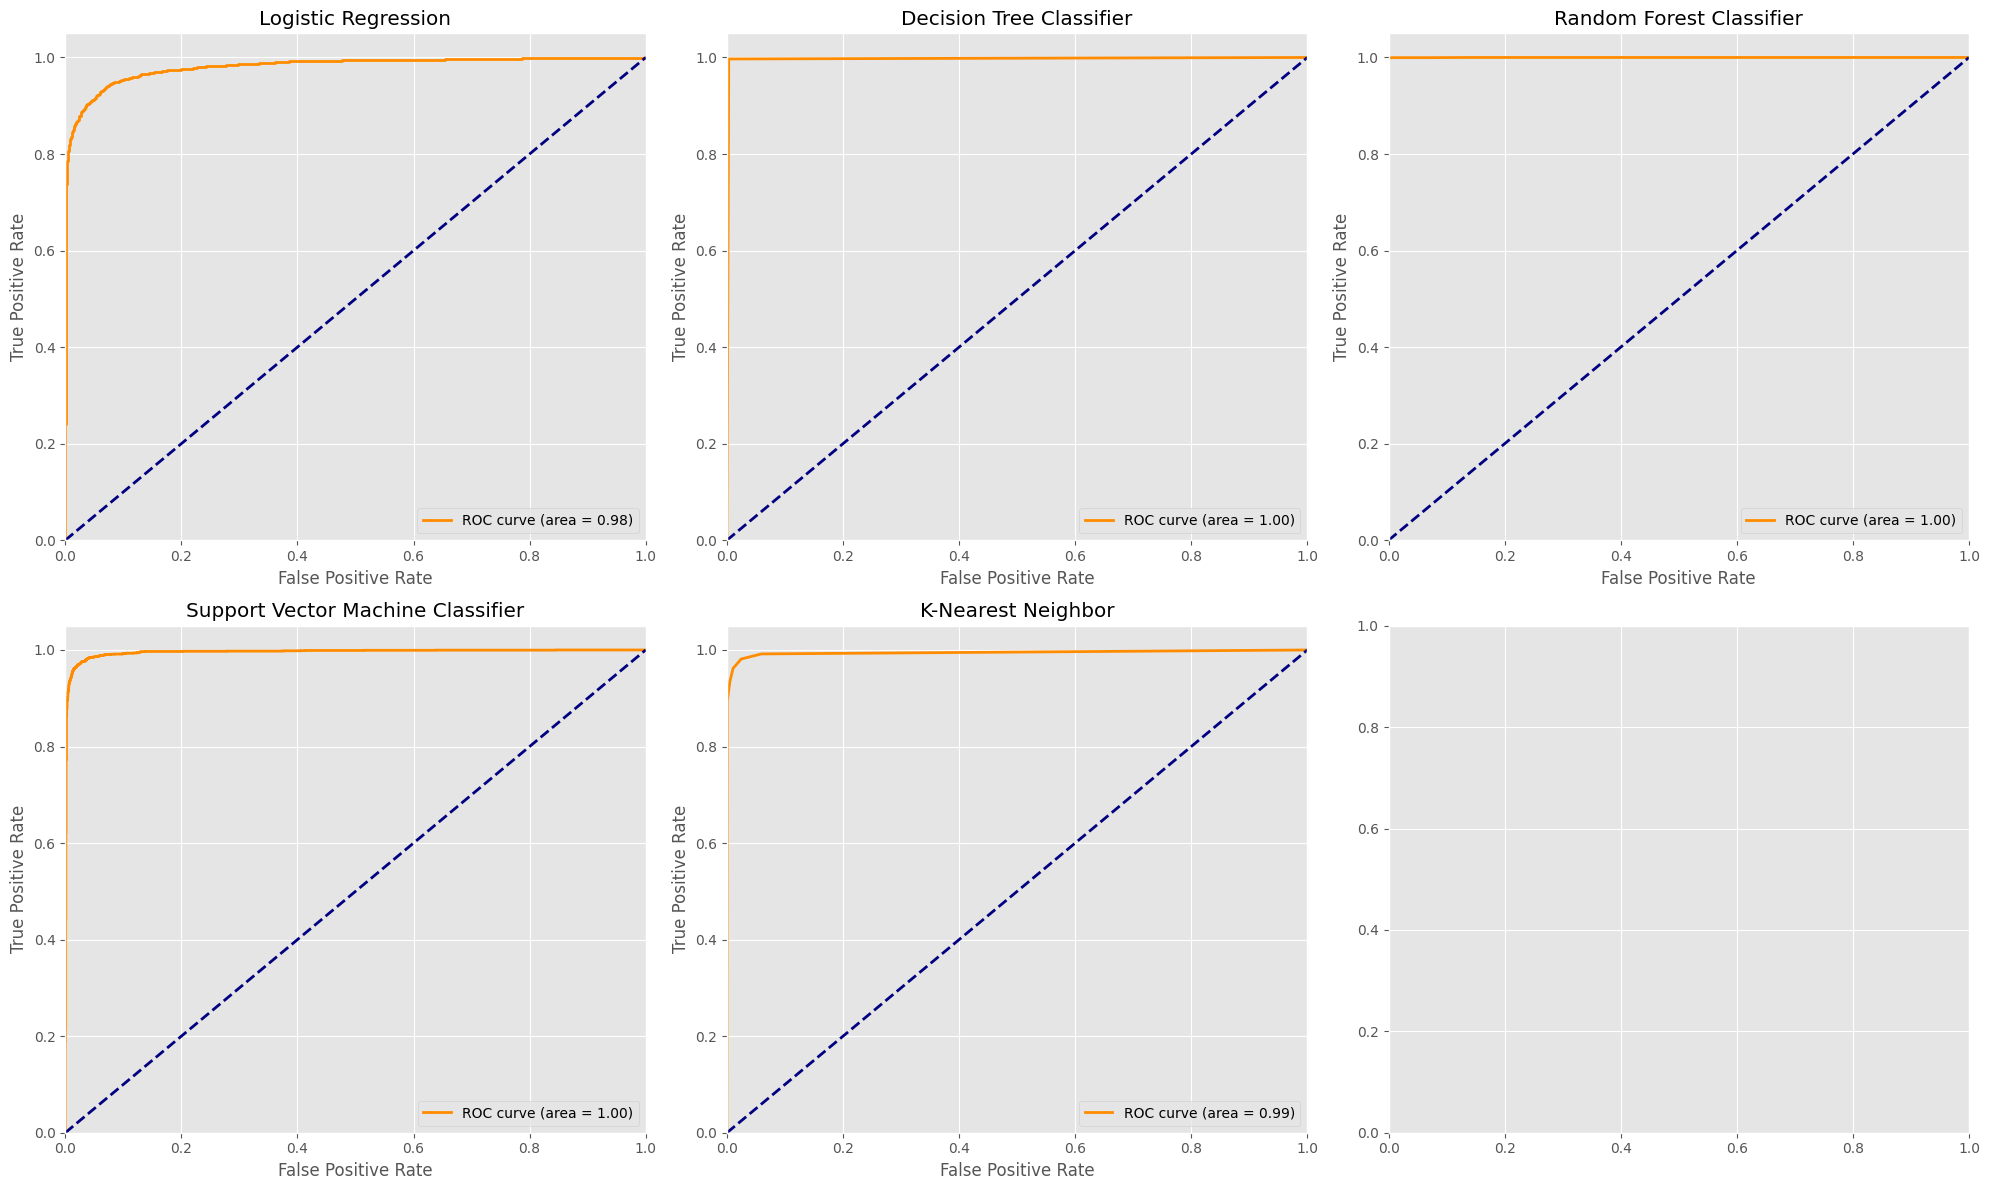

In [77]:
#Plotting the curves


# Define the models and their names
models = [log_model, Dc_model, Rc_model, svc_model, knn_model]
model_names = ['Logistic Regression', 'Decision Tree Classifier', "Random Forest Classifier", 'Support Vector Machine Classifier', 'K-Nearest Neighbor']

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 12))
axes = axes.flatten()

# Plot ROC curve and score for each model
for i, (model, name) in enumerate(zip(models, model_names)):
    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test_scaled)[:, 1])
    roc_auc = auc(fpr, tpr)

    # Ensure that i stays within the bounds of the axes array
    if i < len(axes):
        # Plot ROC curve
        axes[i].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
        axes[i].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        axes[i].set_xlim([0, 1])
        axes[i].set_ylim([0, 1.05])
        axes[i].set_xlabel('False Positive Rate')
        axes[i].set_ylabel('True Positive Rate')
        axes[i].set_title(name)
        axes[i].legend(loc='lower right')
    else:
        # Handle the case where i exceeds the size of the axes array
        print("Index out of bounds error: Index exceeds the size of the axes array")

# Adjust spacing between subplots
plt.tight_layout()

# Show the chart
plt.show()

## ***Hyperparameter Model Tuning using K-fold Cross Validation***

To ensure that the model does not overfit the training data, it is essential to validate it on separate data. One way to achieve this is by splitting the training data into a training set and a validation set. A common technique for this purpose is called K-fold Cross-Validation.

In [78]:
# As Random Forest Classifier is the best model
cv_scores = cross_val_score(Rc_model, X_train_scaled, y_train, cv = 5) # you can adjust the number of folds as needed
print('Cross-validation Scores on Training Set:', cv_scores)
print('Mean CV Score on Training Set:', cv_scores.mean().round(2))

Cross-validation Scores on Training Set: [0.99851    0.99872259 0.99829679 0.99850969 0.99872259]
Mean CV Score on Training Set: 1.0


***It shows that the  Radom Forest Classifier model is able to generalize well on a new and unseen dataset based on the performance and validation score of the model with an average cv_score of 1.0***

## ***FEATURE ENGINEERING***

In [79]:

# Get feature importances from the trained Random Forest classifier
feature_importances = Rc_model.feature_importances_

# Display feature importances alongside feature names
feature_names = X.columns
feature_importances_dict = dict(zip(feature_names, feature_importances))
sorted_feature_importance = sorted(feature_importances_dict.items(), key=lambda x: x[1], reverse=True)


for feature, importance in sorted_feature_importance:
    print(f'{feature}: {importance:.3f}')

Year: 0.448
Kilometres: 0.177
CarOrSUV: 0.160
Price: 0.066
ColourExtInt: 0.053
Brand: 0.018
BodyType: 0.015
Fuel_Consumption_Litres: 0.011
Engine_Volume_Litres: 0.010
FuelType: 0.009
Doors: 0.008
Model: 0.007
Location: 0.006
DriveType: 0.005
Seats: 0.005
CylindersinEngine: 0.002
Transmission: 0.002


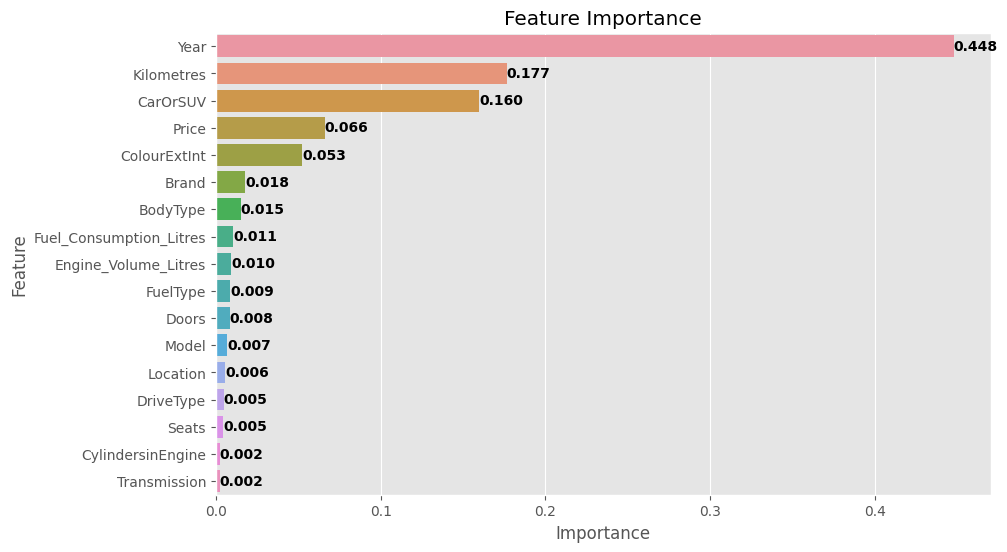

In [80]:
# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances as a bar chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')

# Annotate the bars with the importance values
for i, v in enumerate(feature_importance_df['Importance']):
    ax.text(v, i, f'{v:.3f}', color='black', va='center', fontsize=10, fontweight='bold')

plt.show()

***From the output generated, we can see that Year, CarOrSuv, Kilometres, Price, ColourExtInt seem to contribute more to the Random Forest model and we can call them the major predictors. So therefore, we will re-train our model using these features and look out for any noticeable changes***

In [81]:
# split into training and validation set using 30-70 split ratio
X_train, X_valid, y_train, y_valid = train_test_split(X_resampled, y_resampled, test_size=0.3)

X_train2 = X_train[['Year', 'CarOrSUV', 'Kilometres', 'Price', 'ColourExtInt']]
X_valid2 = X_valid[['Year', 'CarOrSUV', 'Kilometres', 'Price', 'ColourExtInt']]

In [82]:
# Since Random Forest model is the best performing model

# fit the model on the new training set
Rc_model.fit(X_train2, y_train)

# predit on the new testing set
y_valid2_pred = Rc_model.predict(X_valid2)

In [83]:
#Model evaluation metrics
# Calculate accuracy
accuracy = accuracy_score(y_valid2_pred, y_valid)
print(f'Accuracy Score: {accuracy:.2f}')

# Calculate precision
precision = precision_score(y_valid2_pred, y_valid)
print(f'Precision Score: {precision:.2f}')

# Calculate recall
recall = recall_score(y_valid2_pred, y_valid)
print(f'Recall Score: {recall:.2f}')

# Calculate F1-score
f1 = f1_score(y_valid2_pred, y_valid)
print(f'F1-score: {f1:.2f}')


Accuracy Score: 1.00
Precision Score: 1.00
Recall Score: 1.00
F1-score: 1.00


## ***DEPLOYMENT***

***We are going to deploy using STREAMLIT APP and a new python file will be created named Vehicle_Condition_Classifier_App where the model algorithm will be stored to make prediction***

In [84]:
# Saving the Model
import pickle
pickle_out = open('classifier.pkl', mode = 'wb')
pickle.dump(Rc_model, pickle_out)
pickle_out.close()

In [85]:
X.columns

Index(['Brand', 'Year', 'Model', 'CarOrSUV', 'Transmission', 'DriveType',
       'FuelType', 'Kilometres', 'ColourExtInt', 'Location',
       'CylindersinEngine', 'BodyType', 'Doors', 'Seats', 'Price',
       'Engine_Volume_Litres', 'Fuel_Consumption_Litres'],
      dtype='object')

In [86]:
%%writefile Vehicle_Condition_Classifier_App.py
import streamlit as st
import joblib
import numpy as np

# Load the trained model
classifier = joblib.load('classifier.pkl')

st.cache_resource
def predict_car_condition(Year, CarOrSUV, Kilometres, Price, ColorExtInt):
    # Pre-processing User input
    #input for colour 
    if ColorExtInt == "Black/Black":
        ColorExtInt = 0
    elif ColorExtInt == "Grey/Black":
        ColorExtInt = 1
    elif ColorExtInt == "White/Black":
        ColorExtInt = 2
    elif ColorExtInt == "White/Brown":
        ColorExtInt = 3
    else:
        ColorExtInt == 4


    #input for Car/SUV
    if CarOrSUV == "SUV":
        CarOrSUV= 0
    elif CarOrSUV == "Coupe":
        CarOrSUV = 1
    elif CarOrSUV == "Hatchback":
        CarOrSUV = 2   
    elif CarOrSUV == "Sedan":
        CarOrSUV = 3
    elif CarOrSUV == "Alto Blacktown MG":
        CarOrSUV = 4
    else:
        CarOrSUV = 5



    # Making Predictions
    prediction = classifier.predict([[Year, CarOrSUV, Kilometres, Price, ColorExtInt]])

    if prediction == 0:
        pred = "NEW CAR"
    else:
        pred = "USED CAR"

    return pred

def main():

    # Add a title in blue color
    st.markdown("<h1 style='color: blue;font-size: 34px;'>Australian Vehicle Condition Prediction App</h1>", unsafe_allow_html=True)
    
    
    
    Year = st.number_input('Year of Car Manufacture', value = 0, step = 1)
    CarOrSUV = st.selectbox("Type of Car", ("SUV", "Coupe", "Hatchback", "Sedan", "Alto Blacktown MG"))
    Kilometres = st.number_input('Kilometres')
    ColorExtInt = st.selectbox("Color of Car", ("Black/Black", "Grey/Black", "White/Black", "White/Brown"))
    Price = st.number_input('Price (in Australian Dollars($)')


    if st.button('Predict'):
        prediction = predict_car_condition(Year, CarOrSUV, Kilometres, Price, ColorExtInt)
        st.write('Condition of the Vehicle:', prediction)
        print(prediction)

if __name__ == '__main__':
    main()

Overwriting Vehicle_Condition_Classifier_App.py
